In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sb

from data_hub import LoadData

import torch

In [2]:
dataset_name = 'sports-goal'
seq_len = 24
file_name = 'TimeGAN'

In [3]:
train_data, test_data = LoadData(dataset_name, seq_len)

Loading Saved data
Sports Data with 7 dimension loaded with sequence 24


In [4]:
def visualize(ori_data, fake_data, seq_len):
    
    ori_data = np.asarray(ori_data)

    fake_data = np.asarray(fake_data)
    
    ori_data = ori_data[:fake_data.shape[0]]
    
    sample_size = 250
    
    idx = np.random.permutation(len(ori_data))[:sample_size]
    
    randn_num = np.random.permutation(sample_size)[:1]
    
    real_sample = ori_data[idx]

    fake_sample = fake_data[idx]
        
    real_sample_2d = real_sample.reshape(-1, seq_len)

    fake_sample_2d = fake_sample.reshape(-1, seq_len)

        
        
    ### PCA
    
    pca = PCA(n_components=2)
    pca.fit(real_sample_2d)
    pca_real = (pd.DataFrame(pca.transform(real_sample_2d))
                .assign(Data='Real'))
    pca_synthetic = (pd.DataFrame(pca.transform(fake_sample_2d))
                     .assign(Data='Synthetic'))
    pca_result = pca_real.append(pca_synthetic).rename(
        columns={0: '1st Component', 1: '2nd Component'})
    
    
    fig, axs = plt.subplots(ncols = 1, nrows=1, figsize=(8, 5))

    sb.scatterplot(x='1st Component', y='2nd Component', data=pca_result,
                    hue='Data', style='Data', ax=axs)
    sb.despine()
    
    axs.set_title('PCA Result')

In [5]:
fake_data = np.load('synth_data/synth_data_timegan.npy')

In [6]:
test_loader = torch.utils.data.DataLoader(test_data, len(fake_data))

In [7]:
data_batch = next(iter(test_loader))

In [8]:
data_batch.shape

torch.Size([653, 24, 7])

In [9]:
print(f'Shape of Generated data: {fake_data.shape}')

print(f'Shape of Original data: {data_batch.shape}')

Shape of Generated data: (6144, 24, 7)
Shape of Original data: torch.Size([653, 24, 7])


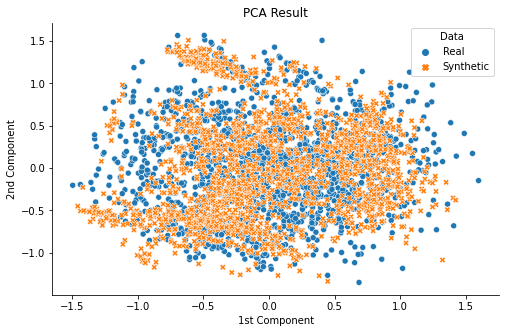

In [10]:
visualize(data_batch, fake_data, seq_len)